1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


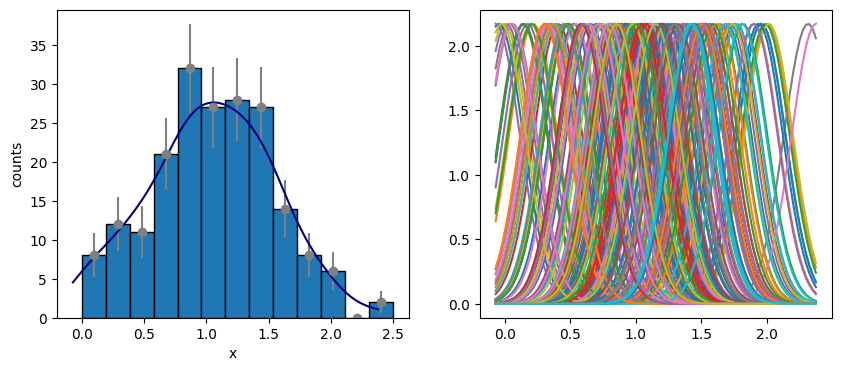

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.integrate import trapezoid

fig, axes = plt.subplots(1,2, figsize=(10,4))

# 1
N = 200
x = np.random.normal(1, .5, N)

# 2
bins = np.linspace(0,2.5,int(np.sqrt(N)))
counts, points, _ = axes[0].hist(x, bins=bins, color="tab:blue", edgecolor="k")
bins_centers = (points[1:]+points[:-1])/2
axes[0].errorbar(bins_centers, counts, yerr=np.sqrt(counts), fmt="o", color="grey")

# axes[0].set_yticks(axes[0].set_yticks()[0].astype(int))
axes[0].set_xlabel("x")
axes[0].set_ylabel("counts")

# 3
sigma = 1.06 * x.std() * x.size**(-1/5)
x_range = np.linspace(min(x), max(x), 100)
list_gaussians = []
for mean in x:
    gaussian = norm(loc=mean, scale=sigma).pdf(x_range)
    axes[1].plot(x_range, gaussian)
    list_gaussians.append(gaussian)

# 4
gauss_sum = np.sum(list_gaussians, axis=0)
hist_integral = trapezoid(counts, bins_centers)
gaussians_integral = trapezoid(gauss_sum, x_range)
axes[0].plot(x_range, gauss_sum*hist_integral/gaussians_integral, color="navy")
plt.show()

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

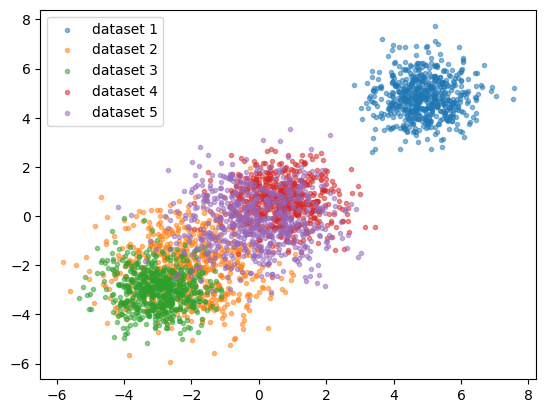

In [142]:
import numpy as np
import matplotlib.pyplot as plt

def datasets2D(n_categories=2, n_points=100):
    means = np.random.uniform(-5, 5, n_categories)
    sigmas = np.random.uniform(.5, 1.5, n_categories)
    return [np.random.normal(means[i], sigmas[i], size=(2, n_points)) 
            for i in range(n_categories)]

list_datasets = datasets2D(5, 600)

for i,data in enumerate(list_datasets):
    plt.scatter(*data, marker=".", label=f"dataset {i+1}", alpha=.5)
plt.legend()
plt.show()

# TODO: np.random.multivariate_normal(mean, cov, 500)

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

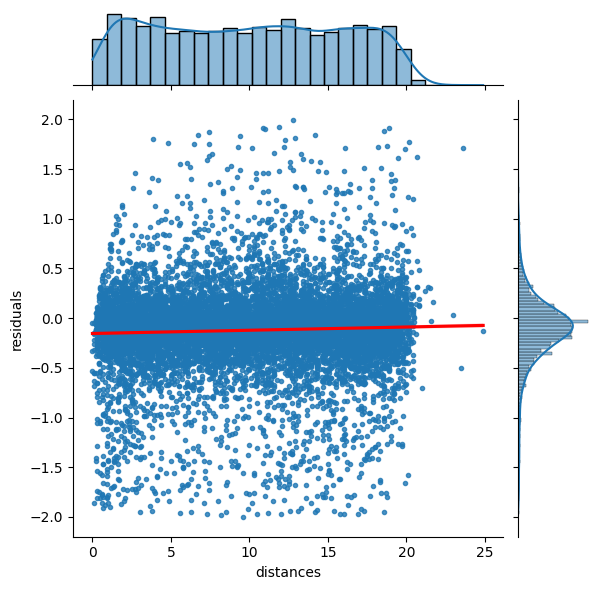

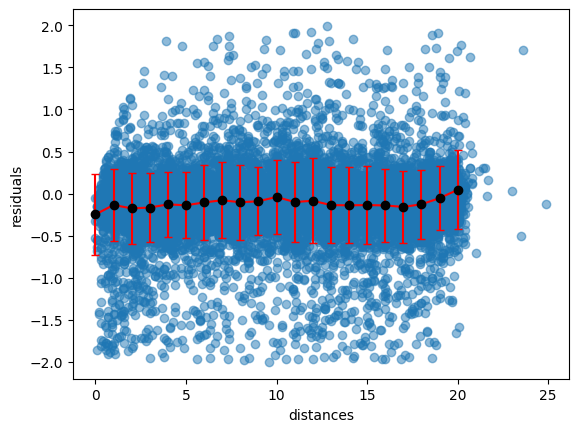

In [3]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# 1 
data = np.load("data/residuals_261.npy", allow_pickle=True)
df = pd.DataFrame(data.item())

# 2-3
df_clean = df[np.abs(df["residuals"])<2]

# 4
residuals, distances = df_clean.iloc[:,0], df_clean.iloc[:,1]
out = stats.linregress(distances, residuals)
slope, intercept = out[:2]

# 5
sns.jointplot(data=df_clean, x="distances", y="residuals", 
              kind="reg", line_kws={"color":"r"}, marker=".")
plt.show()

# 6
x = np.arange(0, 21, 1)
y = []
erry = []
for xi in x:
    res_xi = df_clean[(df_clean["distances"] >= xi) & (df_clean["distances"] < xi+1)]["residuals"]
    y.append( np.mean(res_xi) )
    erry.append( np.std(res_xi) )

plt.scatter(distances, residuals, alpha=.5, marker="o")
plt.errorbar(x, y, yerr=erry, color="r", capsize=3)
plt.scatter(x, y, color="k", zorder=3)
plt.xlabel("distances")
plt.ylabel("residuals")
plt.show()